In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.7 MB/s eta 0:00:00


In [3]:
import random
from faker import Faker

fake = Faker()

# Set the mean and standard deviation for the normal distribution of age
mean_age = 40
std_dev_age = 10

# Define weights for the "Gender" classes
gender_weights = {"Male": 0.48, "Female": 0.52}

# Define weights for age groups (for example: young, middle-aged, and elderly)
age_weights = {
    "Young (<30)": 0.3,
    "Middle-aged (30-60)": 0.5,
    "Elderly (60+)": 0.2
}

# Define weights for the "Race" categories
race_weights = {
    "Caucasian": 0.28,
    "African American": 0.22,
    "Asian": 0.23,
    "Hispanic": 0.17,
    "Other": 0.1
}

# Create a dictionary to define how age, race, and gender influence side effects
side_effect_influence = {
    "Young (<30)": {
            "Caucasian": ["No Side Effect", "Mild Side Effect"],
            "African American": ["Mild Side Effect", "Extreme Side Effect"],
            "Asian": ["No Side Effect"],
            "Hispanic": ["No Side Effect"],
            "Other": ["No Side Effect","Mild Side Effect"]
            },

    "Middle-aged (30-60)": {
            "Caucasian": ["No Side Effect", "Mild Side Effect"],
            "African American": ["Mild Side Effect", "Extreme Side Effect"],
            "Asian": ["No Side Effect"],
            "Hispanic": ["No Side Effect"],
            "Other": ["No Side Effect", "Mild Side Effect"]
        },

    "Elderly (60+)": {
            "Caucasian": ["Mild Side Effect", "Extreme Side Effect"],
            "African American": ["Extreme Side Effect"],
            "Asian": ["Mild Side Effect"],
            "Hispanic": ["Mild Side Effect"],
            "Other": ["Mild Side Effect", "Extreme Side Effect"]
        },

    }

# Create an empty list to store the dataset
dataset = []

# Generate 400,000 fake patient records with patient IDs in the format "P1," "P2," etc.
for patient_id in range(1, 400001):
    name = fake.name()

    # Introduce missing values for Age with a 10% chance
    if random.random() < 0.05:
        age = None
    else:
        # Generate age following a normal distribution
        age = int(np.random.normal(mean_age, std_dev_age))

        # To ensure age is within a reasonable range
        age = max(5, min(age, 95))

        # Categorize age into age groups
        if age < 30:
            age_group = "Young (<30)"
        elif age >= 30 and age <= 60:
            age_group = "Middle-aged (30-60)"
        else:
            age_group = "Elderly (60+)"

    # Generate Gender, Race, and Side Effects
    gender = random.choices(list(gender_weights.keys()), list(gender_weights.values()))[0]

    # Assign race based on weights
    race = random.choices(list(race_weights.keys()), list(race_weights.values()))[0]

    # Determine side effect based on age, and race
    possible_side_effects = side_effect_influence[age_group][race]
    side_effect = random.choice(possible_side_effects)

    # Format the patient ID as "P" followed by the number
    patient_id_formatted = f'P{patient_id}'

    patient_data = {
        "Patient_ID": patient_id_formatted,
        "Name": name,
        "Age": age,
        "Age_Group": age_group,
        "Gender": gender,
        "Race": race,
        "Side_Effect": side_effect
    }

    dataset.append(patient_data)

In [4]:
#converting into dataframe
data=pd.DataFrame(dataset)
data.head()

,Patient_ID,Name,Age,Age_Group,Gender,Race,Side_Effect
0,P1,Michelle Beasley,37.0,Middle-aged (30-60),Male,Asian,No Side Effect
1,P2,Darren Reynolds,37.0,Middle-aged (30-60),Female,Asian,No Side Effect
2,P3,Donna Graham,31.0,Middle-aged (30-60),Female,Caucasian,No Side Effect
3,P4,David Thomas,34.0,Middle-aged (30-60),Female,African American,Extreme Side Effect
4,P5,Christopher Nunez,49.0,Middle-aged (30-60),Female,Asian,No Side Effect


In [5]:
#coverting dataframe into csv file
data.to_csv("/content/data.csv",index=False)

In [ ]:
data.shape

(400000, 7)

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Patient_ID   400000 non-null  object 
 1   Name         400000 non-null  object 
 2   Age          379996 non-null  float64
 3   Age_Group    400000 non-null  object 
 4   Gender       400000 non-null  object 
 5   Race         400000 non-null  object 
 6   Side_Effect  400000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 21.4+ MB


In [ ]:
data.describe()

,Age
count,379996.000000
mean,39.524713
std,9.997573
min,5.000000
25%,33.000000
50%,40.000000
75%,46.000000
max,88.000000


In [ ]:
data.Race.nunique()

5

In [ ]:
data.Race.unique()

array(['Asian', 'African American', 'Hispanic', 'Caucasian', 'Other'],
      dtype=object)

In [ ]:
data.Race.value_counts()

Caucasian           112350
Asian                92138
African American     87730
Hispanic             67923
Other                39859
Name: Race, dtype: int64

In [ ]:
data['Side_Effect'].nunique()

3

In [ ]:
data['Side_Effect'].unique()

array(['No Side Effect', 'Mild Side Effect', 'Extreme Side Effect'],
      dtype=object)

In [ ]:
data['Side_Effect'].value_counts()

No Side Effect         231917
Mild Side Effect       122043
Extreme Side Effect     46040
Name: Side_Effect, dtype: int64

In [ ]:
#Exploratory Data Analysis

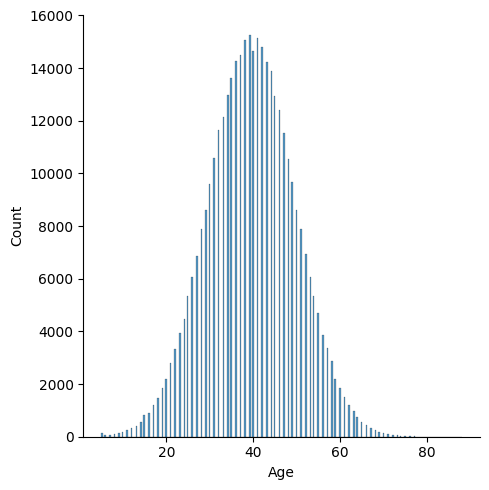

In [ ]:
#distibution plot of Age feature
sns.displot(data.Age)

<Axes: xlabel='Gender', ylabel='count'>

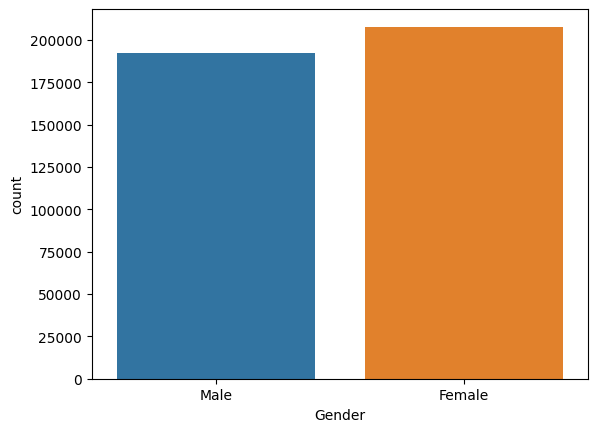

In [ ]:
#countplot to show the count of each Gender class
sns.countplot(data=data,x='Gender')

<Axes: xlabel='Race', ylabel='count'>

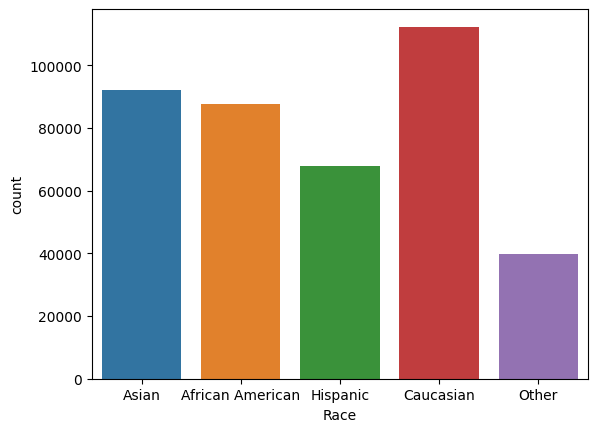

In [ ]:
#countplot to show the count of each Race class
sns.countplot(data=data,x='Race')

<Axes: xlabel='Side_Effect', ylabel='count'>

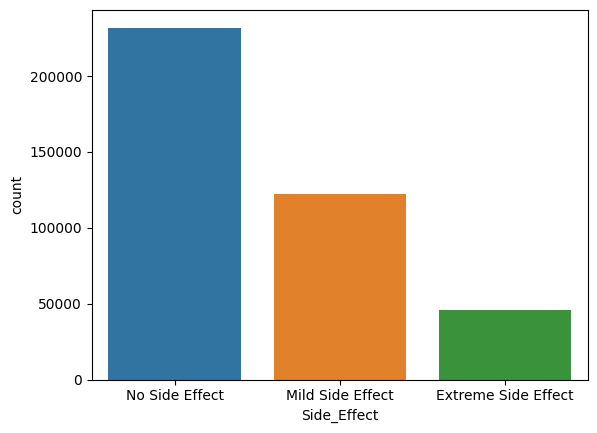

In [ ]:
#countplot to show the count of each target class
sns.countplot(data=data,x='Side_Effect')

<Axes: xlabel='Side_Effect', ylabel='count'>

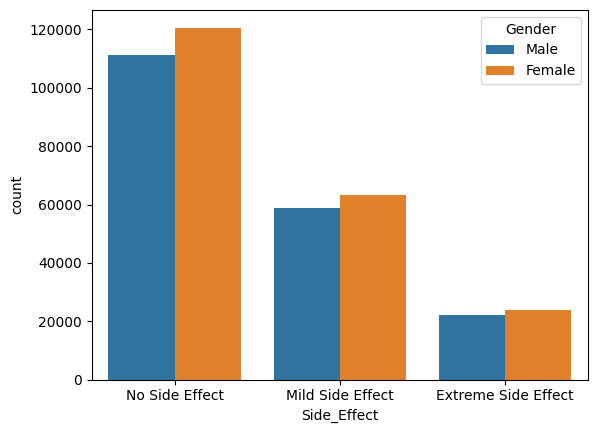

In [ ]:
sns.countplot(data=data,x='Side_Effect',hue='Gender')

<Axes: xlabel='Side_Effect', ylabel='count'>

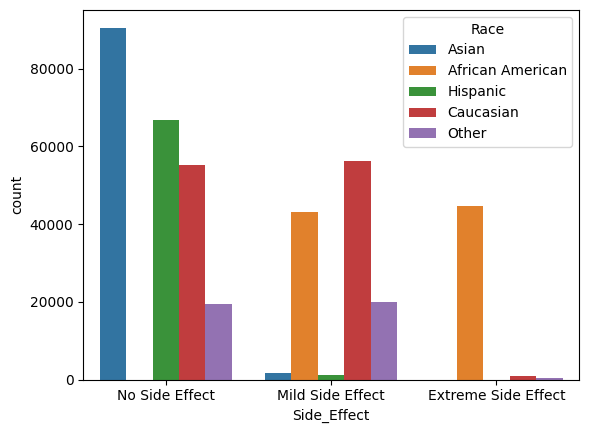

In [ ]:
sns.countplot(data=data,x='Side_Effect',hue='Race')

In [ ]:
data['Race'].unique()

array(['Asian', 'African American', 'Hispanic', 'Caucasian', 'Other'],
      dtype=object)

[112350, 92138, 87730, 67923, 39859]


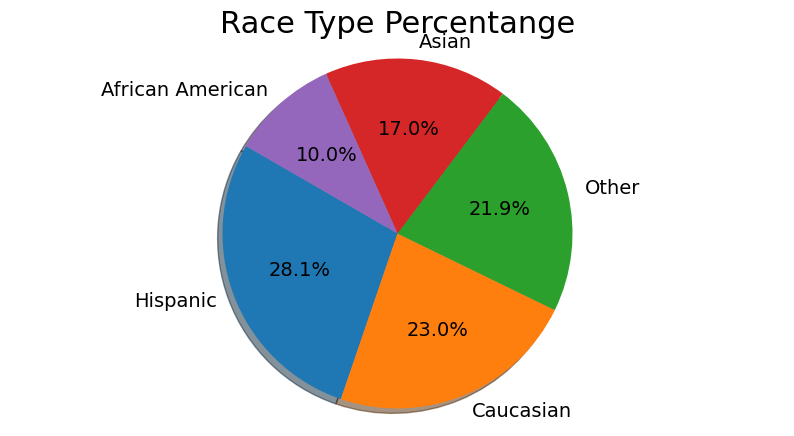

In [ ]:
populations = data['Race'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'Hispanic', 'Caucasian', 'Other', 'Asian', 'African American'

fig = plt.figure(figsize=(10,5))
# Plot
plt.title('Race Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, labels=pop_labels,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

In [ ]:
data['Side_Effect'].unique()

array(['No Side Effect', 'Mild Side Effect', 'Extreme Side Effect'],
      dtype=object)

[231917, 122043, 46040]


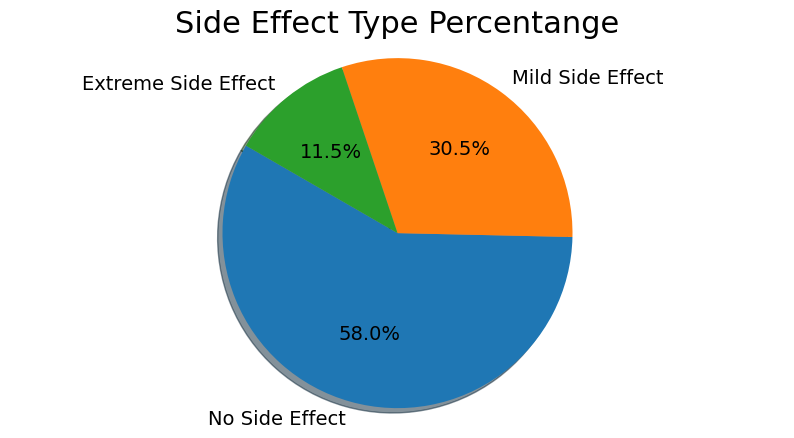

In [ ]:
sideeffect = data['Side_Effect'].value_counts()
se_size = sideeffect.values.tolist() #Provides numerical values
se_types = sideeffect.axes[0].tolist() #Converts index labels object to list
print(se_size)
# Data to plot
se_labels = 'No Side Effect', 'Mild Side Effect', 'Extreme Side Effect'

fig = plt.figure(figsize=(10,5))
# Plot
plt.title('Side Effect Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(se_size, labels=se_labels,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

In [ ]:
data.isna().sum()

Patient_ID         0
Name               0
Age            20004
Age_Group          0
Gender             0
Race               0
Side_Effect        0
dtype: int64

In [5]:
#Filling missing values with mean
data['Age']=data['Age'].fillna(data['Age'].mean())

In [6]:
data=data.drop(['Patient_ID','Name','Age_Group'],axis=1)

In [7]:
#Separating Independent and Dependent Variables

In [8]:
x=data.drop('Side_Effect', axis=1)

In [9]:
y=data['Side_Effect']

In [10]:
#One Hot Encoding

In [11]:
x=pd.get_dummies(x)

In [12]:
x

,Age,Gender_Female,Gender_Male,Race_African American,Race_Asian,Race_Caucasian,Race_Hispanic,Race_Other
0,22.000000,1,0,0,1,0,0,0
1,43.000000,1,0,0,0,1,0,0
2,43.000000,0,1,0,0,1,0,0
3,41.000000,1,0,0,0,0,1,0
4,38.000000,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
399995,39.524265,0,1,1,0,0,0,0
399996,42.000000,1,0,0,0,0,1,0
399997,40.000000,1,0,1,0,0,0,0
399998,46.000000,1,0,0,0,0,0,1


In [13]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset to balance classes
x, y= smote.fit_resample(x, y)

In [14]:
#Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x=std.fit_transform(x)

In [16]:
x=pd.DataFrame(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [ ]:
#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_clf=lr.fit(x_train,y_train)

In [ ]:
y_predictions=lr_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [ ]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))

Accuracy= 0.7563057640356889
Precision= 0.7744763706788753
recall_score= 0.7563057640356889
f1_score= 0.75282678375548


In [ ]:
confusion_matrix(y_test,y_predictions)

array([[56386,  1678,     0],
       [20284, 35215,  2171],
       [    0, 18175, 39702]])

In [ ]:
from sklearn.model_selection import KFold
Kfold_validator=KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(lr_clf,x,y,cv=Kfold_validator)
cv_result

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.69479535, 0.69434071, 0.72968256, 0.66458633, 0.45017955])

In [ ]:
np.mean(cv_result)

0.6467168991735783

In [ ]:
#K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
metric_k=[]
neighbors=np.arange(3,15)

In [ ]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

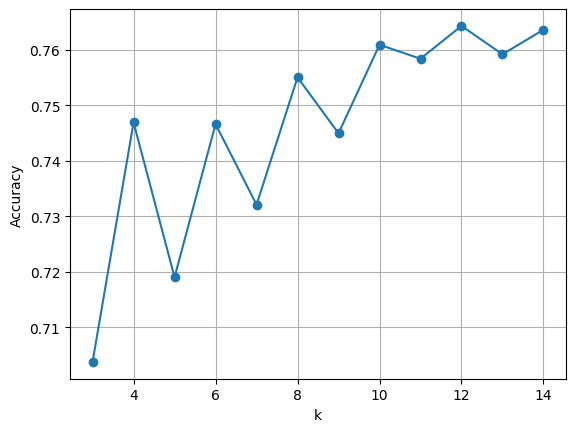

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.grid()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=14,metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)

In [ ]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.7636037713084096
Precision= 0.7789215897913544
recall_score= 0.7636037713084096
f1_score= 0.758290698230856


array([[57748,   363,     0],
       [20908, 34562,  2511],
       [    0, 17363, 40596]])

In [ ]:
cv_result=cross_val_score(classifier,x,y,cv=Kfold_validator)
cv_result

array([0.70076342, 0.701185  , 0.69007469, 0.67215599, 0.53393421])

In [ ]:
np.mean(cv_result)

0.659622664804044

In [ ]:
#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(x_train,y_train)

In [ ]:
y_predictions=dt_clf.predict(x_test)

In [ ]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.7714463002223486
Precision= 0.7985620125961179
recall_score= 0.7714463002223486
f1_score= 0.7681091238917512


array([[57997,   114,     0],
       [21013, 36895,    73],
       [    0, 18580, 39379]])

In [ ]:
cv_result=cross_val_score(dt_clf,x,y,cv=Kfold_validator)
cv_result

array([0.70115124, 0.70096237, 0.7392416 , 0.81724361, 0.46541942])

In [ ]:
np.mean(cv_result)

0.6848036467232959

In [ ]:
#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_predictions=rf_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.7715409737862232
Precision= 0.798639111603287
recall_score= 0.7715409737862232
f1_score= 0.7682043956397309


array([[57949,   115,     0],
       [20895, 36701,    74],
       [    0, 18579, 39298]])

In [ ]:
from sklearn.model_selection import KFold
Kfold_validator=KFold(5)

from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(rf_clf,x,y,cv=Kfold_validator)
cv_result

array([0.70141624, 0.70267624, 0.73796341, 0.79586429, 0.49824319])

In [ ]:
np.mean(cv_result)

0.6872326737286356

In [ ]:
#Hypertuning using Optuna

In [ ]:
!pip install optuna

In [ ]:
import sklearn
def objective(trial):
      n_estimators = trial.suggest_int('n_estimators', 100, 1600)
      max_depth=trial.suggest_int('max_depth',100,500)
      rf_clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth)
      return sklearn.model_selection.cross_val_score(rf_clf,x,y,n_jobs=-1, cv=3).mean()

In [ ]:
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


[I 2023-09-27 20:17:55,858] A new study created in memory with name: no-name-45532275-0bf4-4604-8709-5e3d05fd012e
[I 2023-09-27 20:22:38,414] Trial 0 finished with value: 0.7704318424982324 and parameters: {'n_estimators': 340, 'max_depth': 227}. Best is trial 0 with value: 0.7704318424982324.
[I 2023-09-27 20:42:28,954] Trial 1 finished with value: 0.7704289624922419 and parameters: {'n_estimators': 1452, 'max_depth': 281}. Best is trial 0 with value: 0.7704318424982324.
[I 2023-09-27 20:49:52,253] Trial 2 finished with value: 0.7704332825012274 and parameters: {'n_estimators': 433, 'max_depth': 436}. Best is trial 2 with value: 0.7704332825012274.
[I 2023-09-27 20:51:50,485] Trial 3 finished with value: 0.7704448025251893 and parameters: {'n_estimators': 140, 'max_depth': 489}. Best is trial 3 with value: 0.7704448025251893.
[I 2023-09-27 21:11:06,759] Trial 4 finished with value: 0.7704304024952372 and parameters: {'n_estimators': 1353, 'max_depth': 188}. Best is trial 3 with value:

[I 2023-09-28 09:52:41,364] Trial 45 finished with value: 0.7704318424982324 and parameters: {'n_estimators': 102, 'max_depth': 216}. Best is trial 23 with value: 0.770449122534175.
[I 2023-09-28 10:01:19,991] Trial 46 finished with value: 0.7704347225042228 and parameters: {'n_estimators': 537, 'max_depth': 154}. Best is trial 23 with value: 0.770449122534175.
[I 2023-09-28 10:17:05,096] Trial 47 finished with value: 0.7704304024952373 and parameters: {'n_estimators': 966, 'max_depth': 243}. Best is trial 23 with value: 0.770449122534175.
[I 2023-09-28 10:30:54,281] Trial 48 finished with value: 0.7704361625072179 and parameters: {'n_estimators': 814, 'max_depth': 301}. Best is trial 23 with value: 0.770449122534175.
[I 2023-09-28 10:40:46,327] Trial 49 finished with value: 0.7704318424982324 and parameters: {'n_estimators': 646, 'max_depth': 486}. Best is trial 23 with value: 0.770449122534175.


In [ ]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.770449122534175
Best hyperparameters: {'n_estimators': 874, 'max_depth': 488}


In [ ]:
rf_clf=RandomForestClassifier(max_depth=488,n_estimators=874)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=488, n_estimators=874)

In [ ]:
y_predictions=rf_clf.predict(x_test)

In [ ]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.771552493793596
Precision= 0.7986600622302645
recall_score= 0.771552493793596
f1_score= 0.768217873780681


array([[57949,   115,     0],
       [20895, 36703,    72],
       [    0, 18579, 39298]])

In [ ]:
#catboost algorithm

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
y_predictions=model.predict(x_test)

In [ ]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.7714405547799208
Precision= 0.7985461581123774
recall_score= 0.7714405547799208
f1_score= 0.768093865755035


array([[58003,   108,     0],
       [21018, 36888,    75],
       [    0, 18580, 39379]])

In [ ]:
#Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
y_predictions = ada.predict(x_test)

In [ ]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.5791143970840185
Precision= 0.7525498511688005
recall_score= 0.5791143970840185
f1_score= 0.5203942239133652


array([[ 4686, 53397,     0],
       [ 1043, 56771,    59],
       [    0, 18709, 39273]])

In [ ]:
#Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_predictions=gb.predict(x_test)

In [ ]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.7709931124883579
Precision= 0.7983724061911989
recall_score= 0.7709931124883579
f1_score= 0.767617485064582


array([[57999,    84,     0],
       [20979, 36833,    61],
       [    0, 18709, 39273]])

In [1]:
#Deep Learning

In [17]:
num_classes = len(data['Side_Effect'].unique())

In [18]:
num_classes

3

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode the target labels
y_encoded = label_encoder.fit_transform(y)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.25,random_state=100)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the ANN model
model = Sequential()

# Add input layer
model.add(Dense(units=64, activation='relu', input_dim=8))  # 3 input features (Age, Gender, Race)

# Add hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
16297/16297 [==============================] - 90s 5ms/step - loss: 0.4886 - accuracy: 0.7638 - val_loss: 0.4767 - val_accuracy: 0.7669
Epoch 2/10
16297/16297 [==============================] - 82s 5ms/step - loss: 0.4761 - accuracy: 0.7678 - val_loss: 0.4727 - val_accuracy: 0.7669
Epoch 3/10
16297/16297 [==============================] - 74s 5ms/step - loss: 0.4743 - accuracy: 0.7682 - val_loss: 0.4717 - val_accuracy: 0.7673
Epoch 4/10
16297/16297 [==============================] - 73s 4ms/step - loss: 0.4734 - accuracy: 0.7684 - val_loss: 0.4704 - val_accuracy: 0.7678
Epoch 5/10
16297/16297 [==============================] - 84s 5ms/step - loss: 0.4728 - accuracy: 0.7685 - val_loss: 0.4742 - val_accuracy: 0.7661
Epoch 6/10
16297/16297 [==============================] - 73s 4ms/step - loss: 0.4723 - accuracy: 0.7685 - val_loss: 0.4694 - val_accuracy: 0.7674
Epoch 7/10
16297/16297 [==============================] - 73s 4ms/step - loss: 0.4717 - accuracy: 0.7686 - val_loss: 0

In [37]:
y_predictions = model.predict(x_test)

5433/5433 [==============================] - 8s 1ms/step


In [41]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

5433/5433 [==============================] - 16s 3ms/step - loss: 0.4715 - accuracy: 0.7675
Accuracy: 76.75%
